In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp

%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')

In [3]:
train_data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
n_rows = train_data.shape[0]
pp.pprint('total number of data points: {}'.format(n_rows))
zero_to_NaN_features = ['life_sq',
                        'full_sq',
                        'kitch_sq',
                        'build_year']
train_data[zero_to_NaN_features] = train_data[zero_to_NaN_features] \
    .replace(0, np.NaN)
null_sum = train_data.isnull().sum()
null_tuple = zip(null_sum.index, null_sum)

'total number of data points: 30471'


In [5]:
def get_missing(data, minimal=0.1, full=False):
    """
    return a list of features with missing data the ratio of whose number of 
    missing data entries over total data entries is larger than minimal
    :param data: pandas data frame
    :param minimal: set the minimal proportion of missing data to report
    :param full: if set to True, ignore minial, report all features with
    missing data
    :return: 
    """
    null_sum = data.isnull().sum()
    null_tuple = zip(null_sum.index, null_sum)
    return sorted([null_feature for null_feature
                   in null_tuple if null_feature[1] > n_rows * minimal],
                  key=lambda t: t[1],
                  reverse=True) if not full\
        else sorted([null_feature for null_feature
                     in null_tuple if null_feature[1] > 0],
                    key=lambda t: t[1],
                    reverse=True)

In [6]:
missing_data_features = get_missing(train_data)
missing_data_features

[('hospital_beds_raion', 14441),
 ('build_year', 14135),
 ('state', 13559),
 ('cafe_sum_500_min_price_avg', 13281),
 ('cafe_sum_500_max_price_avg', 13281),
 ('cafe_avg_price_500', 13281),
 ('kitch_sq', 10953),
 ('max_floor', 9572),
 ('material', 9572),
 ('num_room', 9572),
 ('preschool_quota', 6688),
 ('school_quota', 6685),
 ('cafe_sum_1000_min_price_avg', 6524),
 ('cafe_sum_1000_max_price_avg', 6524),
 ('cafe_avg_price_1000', 6524),
 ('life_sq', 6428),
 ('raion_build_count_with_material_info', 4991),
 ('build_count_block', 4991),
 ('build_count_wood', 4991),
 ('build_count_frame', 4991),
 ('build_count_brick', 4991),
 ('build_count_monolith', 4991),
 ('build_count_panel', 4991),
 ('build_count_foam', 4991),
 ('build_count_slag', 4991),
 ('build_count_mix', 4991),
 ('raion_build_count_with_builddate_info', 4991),
 ('build_count_before_1920', 4991),
 ('build_count_1921-1945', 4991),
 ('build_count_1946-1970', 4991),
 ('build_count_1971-1995', 4991),
 ('build_count_after_1995', 4991),
 

In [7]:
missing_data_features = [feature[0] for feature in missing_data_features]

In [8]:
purged_train_data = train_data.drop(missing_data_features, axis=1)

In [9]:
impute_feature = get_missing(purged_train_data, full=True)
impute_feature

[('cafe_sum_2000_min_price_avg', 1725),
 ('cafe_sum_2000_max_price_avg', 1725),
 ('cafe_avg_price_2000', 1725),
 ('cafe_sum_3000_min_price_avg', 991),
 ('cafe_sum_3000_max_price_avg', 991),
 ('cafe_avg_price_3000', 991),
 ('cafe_sum_5000_min_price_avg', 297),
 ('cafe_sum_5000_max_price_avg', 297),
 ('cafe_avg_price_5000', 297),
 ('prom_part_5000', 178),
 ('floor', 167),
 ('metro_min_walk', 25),
 ('metro_km_walk', 25),
 ('railroad_station_walk_km', 25),
 ('railroad_station_walk_min', 25),
 ('ID_railroad_station_walk', 25),
 ('full_sq', 2)]

In [10]:
print 'number of listings with missing information: {}'\
    .format(len(purged_train_data[purged_train_data.isnull().any(axis=1)]))

number of listings with missing information: 1936


In [11]:
purged_train_data[purged_train_data.isnull().any(axis=1)].head()

,id,timestamp,full_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
20,21,2011-09-22,74.0,10.0,Investment,Vnukovo,1.531990e+07,21040,0.051549,0.036270,...,0,0,0,1,5,0,0,0,0,8200000
178,179,2011-10-22,98.0,NaN,Investment,Kurkino,7.792845e+06,21155,0.528252,0.000000,...,6,1,0,1,3,0,0,10,0,11500000
187,188,2011-10-24,49.0,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,...,10,2,0,9,30,0,7,66,16,8300000
195,196,2011-10-25,37.0,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,...,14,4,0,14,32,0,7,69,12,2000000
215,216,2011-10-26,45.0,NaN,Investment,Chertanovo Juzhnoe,9.282439e+06,143661,0.153279,0.127376,...,9,1,0,7,18,1,1,41,5,2825000


In [12]:
from datetime import datetime


list(purged_train_data)
timestamp_datetime = [datetime.strptime(date, '%Y-%m-%d')
                      for date in purged_train_data['timestamp']]
oldest = min(timestamp_datetime)
purged_train_data['delta_timestamp'] = [(date - oldest).days
                                        for date in timestamp_datetime]

In [13]:
print 'total number of sub areas {}'\
    .format(len(purged_train_data['sub_area'].value_counts()))
purged_train_data['sub_area'].value_counts().nlargest(10)

# TODO add floor back in

total number of sub areas 146


Poselenie Sosenskoe         1776
Nekrasovka                  1611
Poselenie Vnukovskoe        1372
Poselenie Moskovskij         925
Poselenie Voskresenskoe      713
Mitino                       679
Tverskoe                     678
Krjukovo                     518
Mar'ino                      508
Poselenie Filimonkovskoe     496
Name: sub_area, dtype: int64

In [14]:
from transformers import StringOneHotEncoder

encoder = StringOneHotEncoder()
one_hot = encoder.fit_transform(purged_train_data['sub_area'])

for i in range(one_hot.shape[1]):
    purged_train_data['sub_area_one_hot_' + str(i)] = one_hot[:, i].toarray()

In [15]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split
# 
# 
# 
# subset = purged_train_data.dropna().head(120)
# train_x, test_x, train_y, text_y = train_test_split(subset,
#                                                     subset['price_doc'],
#                                                     test_size=0.2)
# 
# rgr = KNeighborsRegressor()
# rgr.fit(train_x, train_y)
# 
# %timeit rgr.predict(test_x)

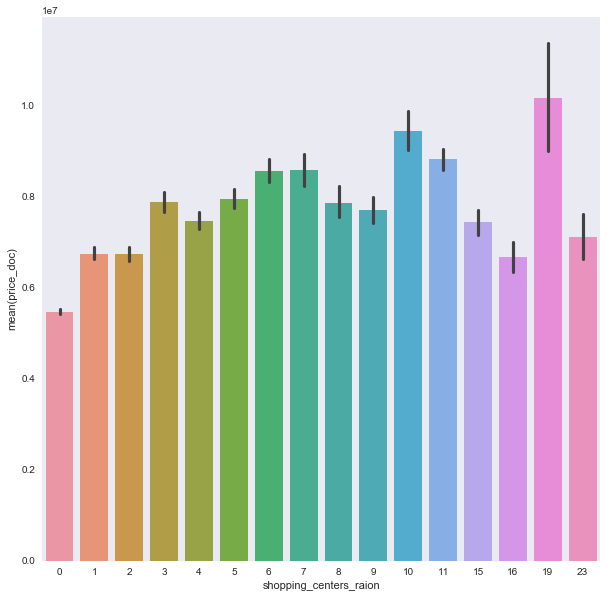

In [16]:
purged_train_data['shopping_centers_raion']
sns.set_style('dark')
plt.figure(figsize=(10, 10))
sns.barplot(x='shopping_centers_raion', y='price_doc', data=purged_train_data)

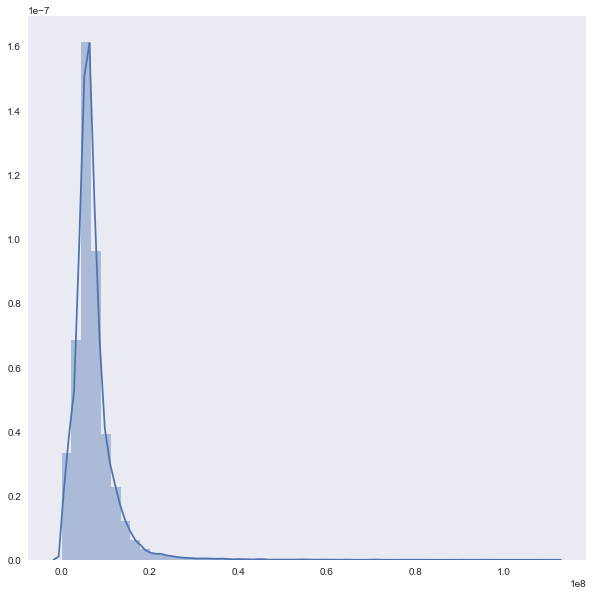

In [17]:
plt.figure(figsize=(10, 10))
sns.distplot(purged_train_data['price_doc'].values.tolist())

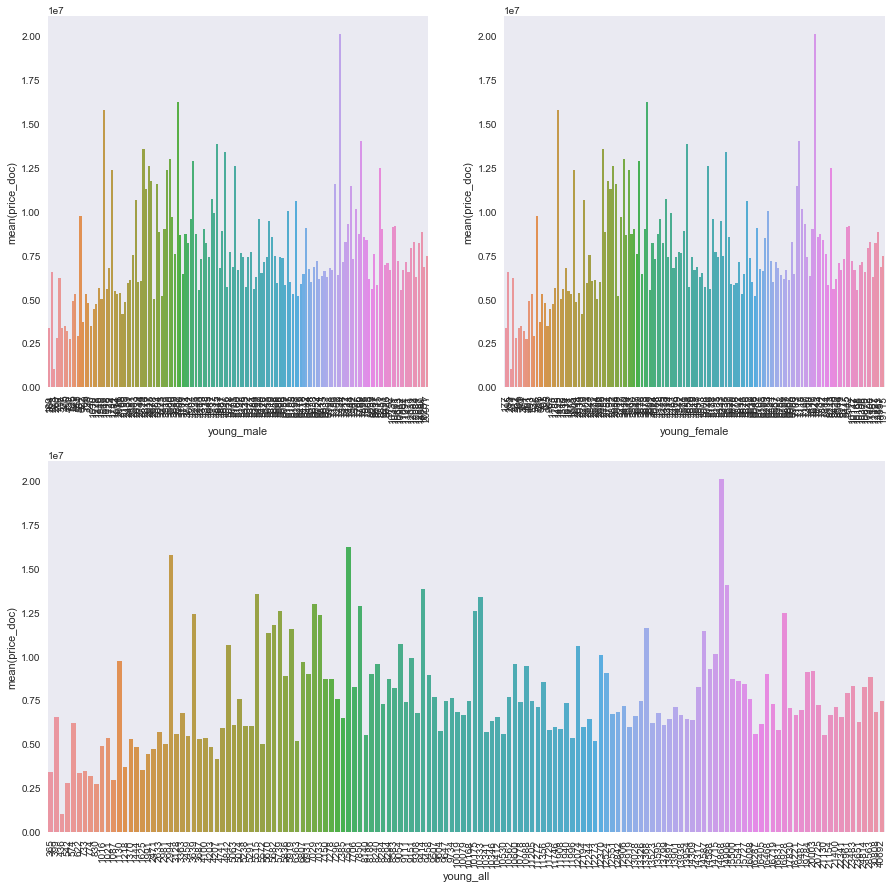

In [18]:
plt.figure(figsize=(15, 15))
sns.barplot(x='young_all', y='price_doc',
            data=purged_train_data,
            ax=plt.subplot(212),
            ci=None)
plt.xticks(rotation='vertical')
sns.barplot(x='young_male',
            y='price_doc',
            data=purged_train_data,
            ax=plt.subplot(221),
            ci=None)
plt.xticks(rotation='vertical')
sns.barplot(x='young_female',
            y='price_doc',
            data=purged_train_data,
            ax=plt.subplot(222),
            ci=None)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
# plt.figure(figsize=(10, 10))
# sns.tsplot(time='delta_timestamp', value='price_doc', data=purged_train_data)

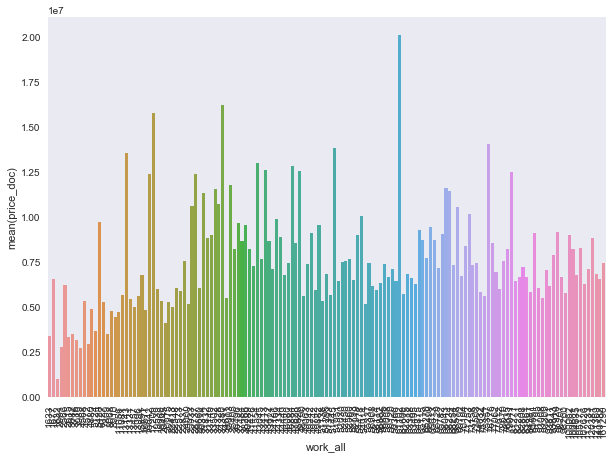

In [20]:
plt.figure(figsize=(10, 7))
sns.barplot(x='work_all', y='price_doc', data=purged_train_data, ci=None)
plt.xticks(rotation='vertical')
plt.show()

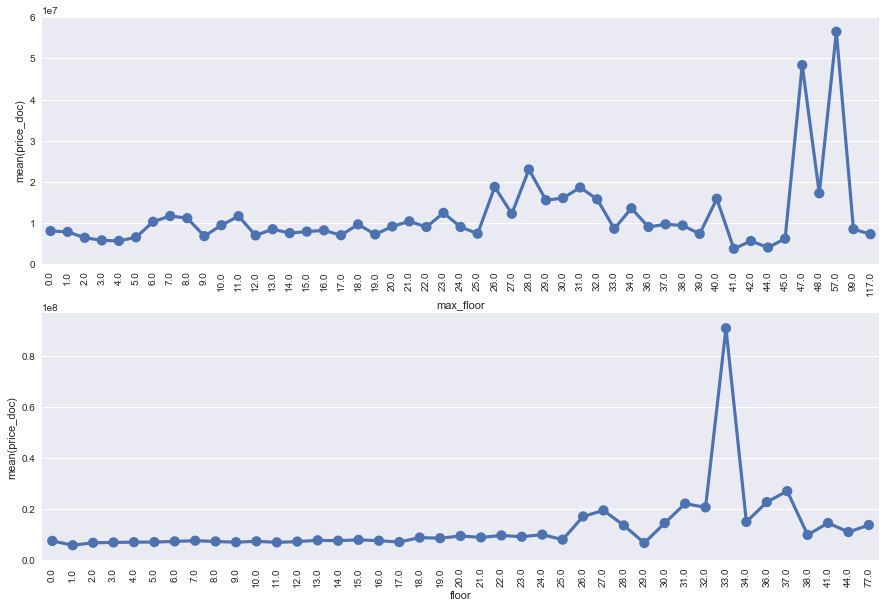

In [21]:
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
sns.pointplot(x='max_floor', y='price_doc', data=train_data, ci=None, ax=plt.subplot(211))
plt.xticks(rotation='vertical')
sns.pointplot(x='floor', y='price_doc', data=train_data, ci=None, ax=plt.subplot(212))
plt.xticks(rotation='vertical')
plt.show()

In [22]:
import xgboost as xgb
from sklearn import preprocessing

train_encoded = train_data.copy()
for col in train_encoded.columns:
    if train_encoded[col].dtype == 'object':
        lbe = preprocessing.LabelEncoder()
        lbe.fit(list(train_encoded[col].values))
        train_encoded[col] = lbe.transform(list(train_encoded[col].values))

train_y = train_encoded.price_doc.values
train_X = train_encoded.drop(["id", "timestamp", "price_doc"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

/home/snowman/anaconda3/envs/graphlab/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


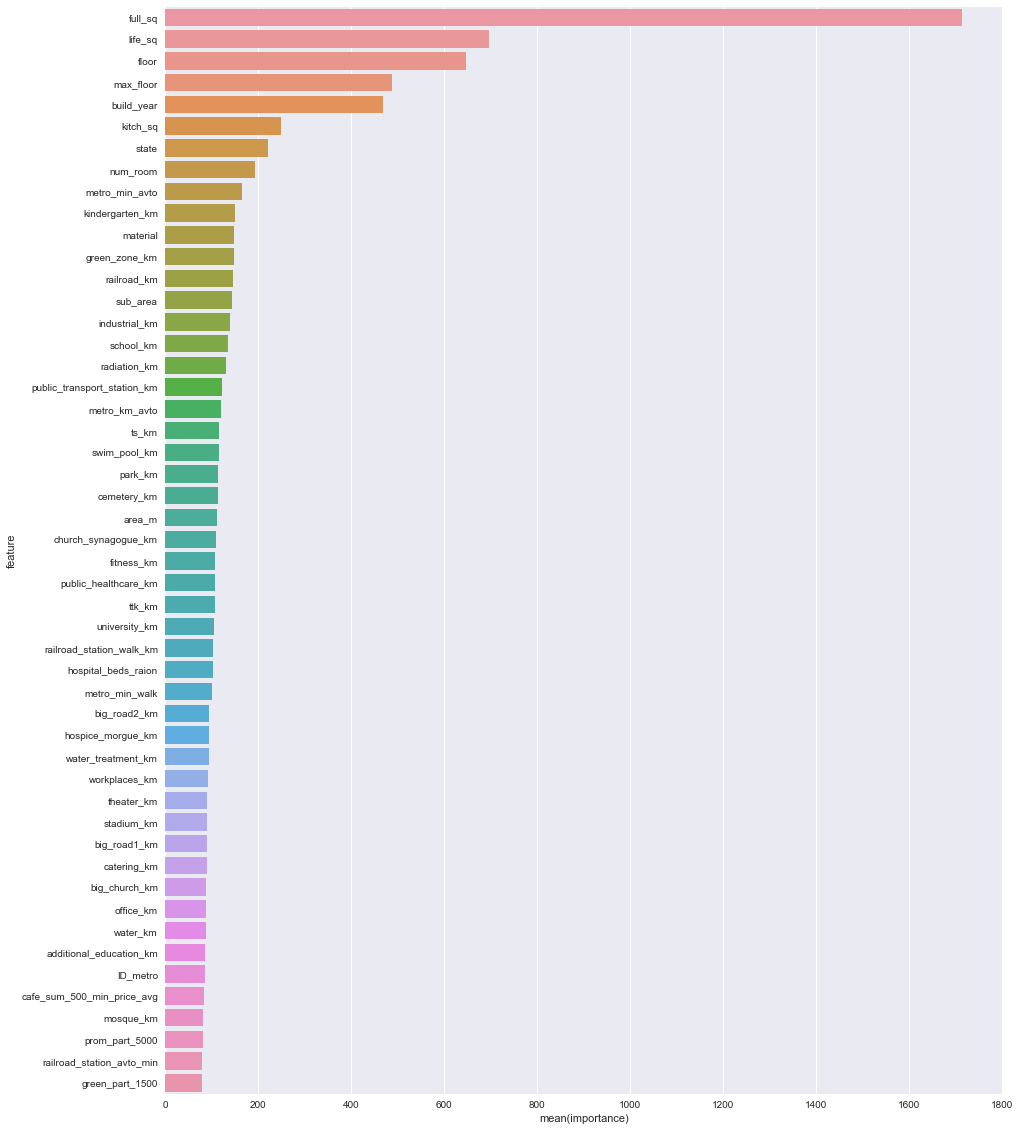

In [23]:
importance = pd.DataFrame(model.get_fscore().items(),
                          columns=['feature', 'importance'])\
               .sort_values('importance', ascending=False)
plt.figure(figsize=(15, 20))
imp_plot = sns.barplot(y='feature', x='importance', data=importance.head(50))

In [24]:
import explorers

In [25]:
purged_train_data = explorers.remove_missing(train_data, minimal=0.33)

In [23]:
import tensorflow as tf

gender = tf.contrib.layers.sparse_column_with_keys(
    column_name="gender", keys=["Female", "Male"])